<a href="https://colab.research.google.com/github/Leon-web-net/ES327_Project/blob/main/Initial_implementation_YOLOV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Change Directory/albumentations/Config_list

In [ ]:
import os
# Change to a new directory
new_directory = '/content/drive/MyDrive/YOLOV3_Pytorch/'
os.chdir(new_directory)

# Confirm the changey
print("New working directory:", os.getcwd())

New working directory: /content/drive/MyDrive/YOLOV3_Pytorch


# remove move able

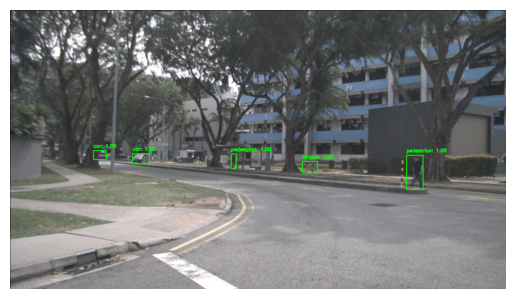

[[0.0, 1, 0.816562, 0.582222, 0.033125, 0.124444], [2.0, 1, 0.26375, 0.532778, 0.03375, 0.036667], [0.0, 1, 0.450625, 0.543333, 0.01, 0.053333], [2.0, 1, 0.180938, 0.52, 0.025625, 0.033333], [4.0, 1, 0.604688, 0.563889, 0.030625, 0.043333]]


In [ ]:
import config
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

dataset_path = "/content/drive/MyDrive/datasets/Nuim_dataset"
img_dir = dataset_path + "/images"
label_dir = dataset_path + "/filtered_labels"

name = "0000"+"0023"
img,label = name + ".jpg", name + ".txt"
img_path,label_path = os.path.join(img_dir,img), os.path.join(label_dir,label)
classes = config.MY_CLASSES

image = cv2.imread(img_path)
# print(type(image))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
bboxes_ = np.loadtxt(label_path, delimiter=" ", ndmin=2).tolist()
bboxes = [[bbox[0], 1] + bbox[1:] for bbox in bboxes_]

draw_bboxes(image,bboxes,classes)
print(bboxes)

In [ ]:
import os
import numpy as np
from tqdm import tqdm

# Define dataset paths
dataset_path = "/content/drive/MyDrive/datasets/Nuim_dataset"
label_dir = os.path.join(dataset_path, "labels")
img_dir = os.path.join(dataset_path, "images")

# Class ID for "movable_object"
movable_class_id = 1


# Find all label files
label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]

# List to hold image names with only movable objects
images_with_only_movable_objects = []

# Iterate over label files
for label_file in tqdm(label_files):
    label_path = os.path.join(label_dir, label_file)

    # Load bounding boxes from the label file
    bboxes = np.loadtxt(label_path, delimiter=" ", ndmin=2).tolist()

    # Extract class IDs
    class_ids = [int(bbox[0]) for bbox in bboxes]

    # Check if all class IDs are the movable class
    if all(class_id == movable_class_id for class_id in class_ids):
        image_name = label_file.replace('.txt', '.jpg')
        images_with_only_movable_objects.append(image_name)

# Print the results
print("Images with only movable objects:")
for img in images_with_only_movable_objects:
    print(img)


100%|██████████| 6000/6000 [02:53<00:00, 34.55it/s] 

Images with only movable objects:
00000013.jpg
00000120.jpg
00000167.jpg
00000222.jpg
00000321.jpg
00000344.jpg
00000339.jpg
00000374.jpg
00000399.jpg
00000408.jpg
00000427.jpg
00000445.jpg
00000490.jpg
00000532.jpg
00000617.jpg
00000689.jpg
00000701.jpg
00000738.jpg
00000759.jpg
00000794.jpg
00000819.jpg
00000917.jpg
00000931.jpg
00000937.jpg
00000990.jpg
00001061.jpg
00001088.jpg
00001142.jpg
00001170.jpg
00001177.jpg
00001167.jpg
00001182.jpg
00001209.jpg
00001240.jpg
00001256.jpg
00001277.jpg
00001314.jpg
00001358.jpg
00001363.jpg
00001436.jpg
00001489.jpg
00001514.jpg
00001526.jpg
00001568.jpg
00001619.jpg
00001633.jpg
00001695.jpg
00001718.jpg
00001746.jpg
00001817.jpg
00001838.jpg
00001915.jpg
00001973.jpg
00002180.jpg
00002210.jpg
00002223.jpg
00002239.jpg
00002347.jpg
00002343.jpg
00002368.jpg
00002491.jpg
00002690.jpg
00002734.jpg
00002832.jpg
00002851.jpg
00002870.jpg
00002891.jpg
00002912.jpg
00002902.jpg
00002917.jpg
00002918.jpg
00002948.jpg
00003013.jpg
00003041.jpg
0000

In [ ]:
import pandas as pd
len(images_with_only_movable_objects)
train_csv_path = dataset_path + "/train.csv"
test_csv_path = dataset_path + "/test.csv"

# Load the CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# Remove images from train.csv
filtered_train_df = train_df[~train_df['image_path'].isin(images_with_only_movable_objects)]
filtered_test_df = test_df[~test_df['image_path'].isin(images_with_only_movable_objects)]

# Save the filtered DataFrames to new CSV files
filtered_train_df.to_csv(os.path.join(dataset_path, "train_1.csv"), index=False)
filtered_test_df.to_csv(os.path.join(dataset_path, "test_1.csv"), index=False)

print("Filtered CSV files saved as train_1.csv and test_1.csv.")

Filtered CSV files saved as train_1.csv and test_1.csv.


In [ ]:
import os
import numpy as np
from tqdm import tqdm

# Define paths
dataset_path = "/content/drive/MyDrive/datasets/Nuim_dataset"
label_dir = os.path.join(dataset_path, "labels")
filtered_label_dir = os.path.join(dataset_path, "filtered_labels")

# Convert to a set of corresponding .txt files
movable_object_label_files = {img.replace(".jpg", ".txt") for img in images_with_only_movable_objects}

# Create the new directory if it doesn't exist
os.makedirs(filtered_label_dir, exist_ok=True)
i = 0
# Process each label file
for label_file in tqdm(os.listdir(label_dir), desc="Processing Labels"):
    label_path = os.path.join(label_dir, label_file)

    # Skip files in the images_with_only_movable_objects list
    if label_file in movable_object_label_files:
        continue

    # Load bounding boxes
    bboxes = np.loadtxt(label_path, delimiter=" ", ndmin=2).tolist()

    # Filter out movable object annotations (class_id = 1)
    filtered_bboxes = [bbox for bbox in bboxes if int(bbox[0]) != 1]

    # If no annotations remain, skip saving the file
    if not filtered_bboxes:
        continue

    # Adjust class IDs: if class ID > 2, shift it down by 1
    adjusted_bboxes = [[bbox[0] - 1 if bbox[0] > 1 else bbox[0]] + bbox[1:] for bbox in filtered_bboxes]

    formatted_bboxes = [
        f"{int(bbox[0])} {bbox[1]:.6f} {bbox[2]:.6f} {bbox[3]:.6f} {bbox[4]:.6f}"
        for bbox in adjusted_bboxes
    ]
    # Save the filtered bounding boxes to the new directory
    filtered_label_path = os.path.join(filtered_label_dir, label_file)
    np.savetxt(filtered_label_path, formatted_bboxes, fmt="%s")

print(f"Filtered labels directory created at: {filtered_label_dir}")


Processing Labels: 100%|██████████| 6000/6000 [04:07<00:00, 24.25it/s]

Filtered labels directory created at: /content/drive/MyDrive/datasets/Nuim_dataset/filtered_labels


In [ ]:
import pandas as pd
import os

# Paths
dataset_path = "/content/drive/MyDrive/datasets/Nuim_dataset"
label_dir = os.path.join(dataset_path, "labels")
train_csv_path = os.path.join(dataset_path, "train_1.csv")
test_csv_path = os.path.join(dataset_path, "test_1.csv")

# Load CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# Get the list of label files in the filtered labels directory
label_files = set(os.listdir(label_dir))

# Convert CSV label paths to .txt file names
train_labels = set(train_df['label_path'].apply(lambda x: f"{x}.txt"))
test_labels = set(test_df['label_path'].apply(lambda x: f"{x}.txt"))

# Check if all train labels exist
missing_train_labels = train_labels - label_files
if missing_train_labels:
    print("Missing train labels:")
    print(missing_train_labels)
else:
    print("All train labels are present.")

# Check if all test labels exist
missing_test_labels = test_labels - label_files
if missing_test_labels:
    print("Missing test labels:")
    print(missing_test_labels)
else:
    print("All test labels are present.")


Missing train labels:
{'00004368.txt.txt', '00005385.txt.txt', '00001246.txt.txt', '00005163.txt.txt', '00001171.txt.txt', '00003426.txt.txt', '00002888.txt.txt', '00004301.txt.txt', '00002770.txt.txt', '00004551.txt.txt', '00000885.txt.txt', '00000137.txt.txt', '00004622.txt.txt', '00003946.txt.txt', '00005203.txt.txt', '00004588.txt.txt', '00002989.txt.txt', '00001860.txt.txt', '00002336.txt.txt', '00002468.txt.txt', '00005649.txt.txt', '00001750.txt.txt', '00001214.txt.txt', '00004222.txt.txt', '00000356.txt.txt', '00003063.txt.txt', '00005173.txt.txt', '00002646.txt.txt', '00003719.txt.txt', '00005552.txt.txt', '00005769.txt.txt', '00002233.txt.txt', '00001789.txt.txt', '00004576.txt.txt', '00001904.txt.txt', '00003562.txt.txt', '00002537.txt.txt', '00002604.txt.txt', '00005528.txt.txt', '00003792.txt.txt', '00003666.txt.txt', '00001751.txt.txt', '00004153.txt.txt', '00002881.txt.txt', '00004468.txt.txt', '00000962.txt.txt', '00004198.txt.txt', '00004686.txt.txt', '00003097.txt.txt

# Pascal Voc to Yolo

In [ ]:
# import os

# HEIGHT = 900
# WIDTH = 1600

# dataset_path = "/content/drive/MyDrive/datasets/Nuim_dataset"
# os.makedirs(dataset_path + "/labels_yolo", exist_ok=True)
# label_path = dataset_path + "/labels"
# yolo_label_path = dataset_path + "/labels_yolo"

# label_list = os.listdir(label_path)
# labels_num = len(label_list)
# print(labels_num)
# i = 0
# for label_file in label_list:

#     with open(os.path.join(label_path, label_file), "r") as file:
#         lines = file.readlines()

#     yolo_labels = []
#     for line in lines:
#         values = line.strip().split()
#         class_id = int(values[0])
#         x1, y1, x2, y2 = map(float, values[1:])

#         # Convert from Pascal VOC to YOLO format
#         x_center = (x1 + x2) / 2 / WIDTH
#         y_center = (y1 + y2) / 2 / HEIGHT
#         width = (x2 - x1) / WIDTH
#         height = (y2 - y1) / HEIGHT

#         # Format the YOLO label
#         yolo_labels.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

#     # Save the YOLO labels to a new file in the labels_yolo directory
#     with open(os.path.join(yolo_label_path, label_file), "w") as file:
#         file.write("\n".join(yolo_labels))

# print(f"Converted {labels_num} label files to YOLO format.")

6000
Converted 6000 label files to YOLO format.


# Class Instances

In [ ]:
import pandas as pd
import os
from concurrent.futures import ThreadPoolExecutor
import tqdm

# Define your class names
class_names = [
    "pedestrian",
    "car",
    "bus",
    "bicycle",
    "truck",
    "motorcycle",
]

# Function to count class instances from a list of label files
def process_label_file(label_path):
    class_counts = {class_name: 0 for class_name in class_names}

    try:
        with open(label_path, "r") as file:
            lines = file.readlines()
            for line in lines:
                class_idx = int(line.split()[0])
                class_name = class_names[class_idx]
                class_counts[class_name] += 1
    except Exception as e:
        print(f"Error reading {label_path}: {e}")

    return class_counts

# Function to aggregate counts from all label files
def count_class_instances(csv_path, label_dir, num_threads=8):
    df = pd.read_csv(csv_path)
    label_paths = [os.path.join(label_dir, path) for path in df["label_path"]]

    # Initialize class counts
    total_counts = {class_name: 0 for class_name in class_names}

    # Use multithreading to process files in parallel
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        results = list(tqdm.tqdm(executor.map(process_label_file, label_paths), total=len(label_paths)))

    # Aggregate the counts
    for result in results:
        for class_name, count in result.items():
            total_counts[class_name] += count

    return total_counts

# Paths to your train.csv and test.csv
dataset_path = "/content/drive/MyDrive/datasets/Nuim_dataset"
train_csv_path = os.path.join(dataset_path, "train.csv")
test_csv_path = os.path.join(dataset_path, "test.csv")
label_dir = os.path.join(dataset_path, "labels")

# Count class instances
train_class_counts = count_class_instances(train_csv_path, label_dir)
test_class_counts = count_class_instances(test_csv_path, label_dir)

# Print the results
print("\nClass Instances in Train Dataset:")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count}")

print("\nClass Instances in Test Dataset:")
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count}")


100%|██████████| 1200/1200 [01:08<00:00, 17.52it/s]


Class Instances in Train Dataset:
pedestrian: 11484
car: 16842
bus: 549
bicycle: 1274
truck: 2460
motorcycle: 1085

Class Instances in Test Dataset:
pedestrian: 2674
car: 4151
bus: 152
bicycle: 339
truck: 615
motorcycle: 282


# Normalisation Values

In [ ]:
import os
import cv2
from torch.utils.data import Dataset, DataLoader
import config

class CustomImageDataset(Dataset):
    def __init__(self, image_folder, transform=None):
        self.image_folder = image_folder
        self.image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith(('.jpg', '.png'))]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0  # Normalize to [0, 1]

        if self.transform:
            image = self.transform(image)

        return image
# Path to your images
image_folder = config.IMG_DIR

# Create the dataset and DataLoader
dataset = CustomImageDataset(image_folder=image_folder)



In [ ]:
import torch
from tqdm import tqdm

def calculate_mean_std(loader):
    mean_sum = torch.zeros(3)
    std_sum = torch.zeros(3)
    pixel_count = 0

    for images in tqdm(loader, desc="Calculating Mean and Std"):
        # Reshape the images to (batch_size * height * width, channels)
        images = images.permute(0, 2, 3, 1).reshape(-1, 3)

        # Update sums
        mean_sum += images.mean(dim=0)
        std_sum += images.std(dim=0, unbiased=False)
        pixel_count += 1

    mean = mean_sum / pixel_count
    std = std_sum / pixel_count

    return mean, std

# Use DataLoader with num_workers=0
loader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=0)

# Calculate mean and std
mean, std = calculate_mean_std(loader)
print(f"Mean: {mean}")
print(f"Std: {std}")




Calculating Mean and Std: 100%|██████████| 188/188 [18:03<00:00,  5.76s/it]

Mean: tensor([0.4112, 0.4124, 0.4119])
Std: tensor([0.2038, 0.2032, 0.2033])


# Anchor boxes K means cluster

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans
import tqdm

# Define image size (same as used in your training)
IMAGE_SIZE = 416


In [ ]:
def load_bbox_dimensions(label_dir):
    bbox_dims = []

    # Iterate through all label files
    for label_file in tqdm.tqdm(os.listdir(label_dir)):
        label_path = os.path.join(label_dir, label_file)
        with open(label_path, "r") as f:
            for line in f.readlines():
                # YOLO format: class_idx, x_center, y_center, width, height
                _, _, _, width, height = map(float, line.strip().split())
                bbox_dims.append([width * IMAGE_SIZE, height * IMAGE_SIZE])  # Scale to image size

    return np.array(bbox_dims)


In [ ]:
def run_kmeans(bbox_dims, n_clusters=9):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")
    kmeans.fit(bbox_dims)

    # Get the resulting anchor boxes
    anchors = kmeans.cluster_centers_
    anchors = np.array(anchors, dtype=np.float32)

    # Sort anchors by area (width * height) for consistency
    anchors = anchors[np.argsort(anchors[:, 0] * anchors[:, 1])]

    return anchors

def normalize_anchors(anchors, image_size):
    normalized_anchors = anchors / image_size
    return normalized_anchors

In [ ]:
# Set paths
LABEL_DIR = "/content/drive/MyDrive/datasets/Nuim_dataset/labels"

# Load bounding box dimensions
bbox_dims = load_bbox_dimensions(LABEL_DIR)

# Run K-means clustering to find anchor boxes
optimized_anchors = run_kmeans(bbox_dims, n_clusters=9)

# Normalize the anchor boxes
normalized_anchors = normalize_anchors(optimized_anchors, IMAGE_SIZE)

# Print the optimized anchor boxes
print("Optimized Anchor Boxes (YOLO format):")
for anchor in normalized_anchors:
    print(f"[{anchor[0]:.4f}, {anchor[1]:.4f}]")


100%|██████████| 6000/6000 [03:23<00:00, 29.42it/s] 


Optimized Anchor Boxes (YOLO format):
[0.0268, 0.0391]
[0.0291, 0.0968]
[0.0990, 0.0883]
[0.0617, 0.2067]
[0.2060, 0.1848]
[0.1867, 0.3884]
[0.4582, 0.4162]
[0.3496, 0.7829]
[0.8309, 0.6631]


In [ ]:
normalized_anchors

array([[0.02676237, 0.03910339],
       [0.02912911, 0.09682776],
       [0.09896278, 0.08832304],
       [0.06172492, 0.20674099],
       [0.20595065, 0.18483427],
       [0.1867365 , 0.38838318],
       [0.4582043 , 0.41617742],
       [0.3495608 , 0.7828929 ],
       [0.83089226, 0.66308045]], dtype=float32)

# Albumentation Edit

In [ ]:
!pip install albumentations==2.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.9/273.9 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.7/632.7 kB 36.5 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.19
    Uninstalling albucore-0.0.19:
      Successfully uninstalled albucore-0.0.19
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


In [ ]:
import config

config.DEVICE

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: '2.0.1' (you have '2.0.0'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


'cuda'

In [ ]:
import shutil


# # Replace the file from Google Drive
# src = "/content/drive/MyDrive/YOLOV3_Pytorch/bbox_utils.py"
# dst = "/usr/local/lib/python3.10/dist-packages/albumentations/core/bbox_utils.py"

# shutil.copy(src, dst)
# print("File replaced successfully!")


File replaced successfully!


In [ ]:
"""
Information about architecture config:
Tuple is structured by (filters, kernel_size, stride)
Every conv is a same convolution.
List is structured by "B" indicating a residual block followed by the number of repeats
"S" is for scale prediction block and computing the yolo loss
"U" is for upsampling the feature map and concatenating with a previous layer
"""

config_list = [
    (32, 3, 1),
    (64, 3, 2),
    ["B", 1],
    (128, 3, 2),
    ["B", 2],
    (256, 3, 2),
    ["B", 8],
    (512, 3, 2),
    ["B", 8],
    (1024, 3, 2),
    ["B", 4],  # To this point is Darknet-53
    (512, 1, 1),
    (1024, 3, 1),
    "S",
    (256, 1, 1),
    "U",
    (256, 1, 1),
    (512, 3, 1),
    "S",
    (128, 1, 1),
    "U",
    (128, 1, 1),
    (256, 3, 1),
    "S",
]

# Model

In [ ]:
import torch
import torch.nn as nn
import config

class CNNBlock(nn.Module):
  def __init__(self, in_channels, out_channels, bn_act=True, **kwargs):
    super().__init__()
    self.conv = nn.Conv2d(in_channels, out_channels, bias=not bn_act, **kwargs)
    self.bn = nn.BatchNorm2d(out_channels)
    self.leaky = nn.LeakyReLU(0.1)
    self.use_bn_act = bn_act


  def forward(self, x):
    if self.use_bn_act:
      return self.leaky(self.bn(self.conv(x)))
    else:
      return self.conv(x)

class ResidualBlock(nn.Module):
  def __init__(self, channels, use_residual=True, num_repeats=1):
    super().__init__()
    self.layers = nn.ModuleList()
    for repeat in range(num_repeats):
      self.layers +=[
          nn.Sequential(
          CNNBlock(channels, channels//2, kernel_size=1),
          CNNBlock(channels//2, channels, kernel_size=3, padding=1),
          )
      ]
      self.use_residual = use_residual
      self.num_repeats = num_repeats

  def forward(self, x):
    for layer in self.layers:
      x = layer(x) + x if self.use_residual else layer(x)
    return x

class ScalePrediction(nn.Module):
  def __init__(self, in_channels, num_classes):
    super().__init__()
    self.pred = nn.Sequential(
        CNNBlock(in_channels, 2*in_channels, kernel_size=3, padding=1),
        CNNBlock(2*in_channels, 3*(5+num_classes), bn_act=False, kernel_size=1),  # [po, x, y, w, h]
    )

    self.num_classes = num_classes

  def forward(self,x):
    return(
        self.pred(x).reshape(
            x.shape[0],3, self.num_classes+5, x.shape[2], x.shape[3]
        ).permute(0,1,3,4,2)  # change order
    )

class YOLOv3(nn.Module):

  def __init__(self, in_channels=3, num_classes=10):
    super().__init__()
    self.num_classes = num_classes
    self.in_channels = in_channels
    self.layers = self._create_conv_layers()

  def forward(self,x):
    outputs = []
    route_connections = []

    for layer in self.layers:
      if isinstance(layer, ScalePrediction):
        outputs.append(layer(x))
        continue
      x = layer(x)

      if isinstance(layer, ResidualBlock) and layer.num_repeats == 8:
        route_connections.append(x)

      elif isinstance(layer, nn.Upsample):
        x = torch.cat([x, route_connections[-1]], dim=1)
        route_connections.pop()

    return outputs

  def _create_conv_layers(self):
    layers = nn.ModuleList()
    in_channels = self.in_channels

    for module in config_list:
      if isinstance(module, tuple):
        out_channels, kernel_size, stride = module
        layers.append(CNNBlock(
            in_channels,
            out_channels,
            kernel_size = kernel_size,
            stride = stride,
            padding = 1 if kernel_size == 3 else 0,
        ))
        in_channels = out_channels

      elif isinstance(module, list):
        num_repeats = module[1]
        layers.append(ResidualBlock(in_channels, num_repeats=num_repeats,))

      elif isinstance(module, str):
        if module == "S":
          layers+=[
              ResidualBlock(in_channels, use_residual=False, num_repeats=1),
              CNNBlock(in_channels, in_channels//2, kernel_size=1),
              ScalePrediction(in_channels//2, num_classes=self.num_classes),
          ]

          in_channels = in_channels // 2

        elif module == "U":
          layers.append(nn.Upsample(scale_factor=2),)
          in_channels = in_channels * 3

    return layers


if __name__ == "__main__":
  num_classes = config.NUM_CLASSES
  IMAGE_SIZE = config.IMAGE_SIZE
  model = YOLOv3(num_classes=num_classes)
  x = torch.randn((2,3,IMAGE_SIZE,IMAGE_SIZE))
  out = model(x)
  assert model(x)[0].shape == (2,3,IMAGE_SIZE//32, IMAGE_SIZE//32, num_classes+5)
  assert model(x)[1].shape == (2,3,IMAGE_SIZE//16, IMAGE_SIZE//16, num_classes+5)
  assert model(x)[2].shape == (2,3,IMAGE_SIZE//8, IMAGE_SIZE//8, num_classes+5)
  print("Success!")


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: '2.0.2' (you have '2.0.0'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Success!


## Imports

In [ ]:
import numpy as np
import os
import pandas as pd
import torch

from PIL import Image, ImageFile
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from utils import iou_width_height, intersection_over_union, non_max_suppression


# Dataset Loader

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Loss Function

In [ ]:
import torch
import torch.nn as nn

from utils import intersection_over_union

class YoloLoss(nn.Module):
  def __init__(self):
    super().__init__()
    self.mse = nn.MSELoss()
    self.bce = nn.BCEWithLogitsLoss()
    self.entropy = nn.CrossEntropyLoss()
    self.sigmoid = nn.Sigmoid()

    # Constants (Default class:1, noobj:10, obj:1, lamdabox:10)
    self.lambda_class = 1
    self.lambda_noobj = 5
    self.lambda_obj = 2
    self.lambda_box = 10


  def forward(self, predictions, target, anchors):
    obj = target[...,0] == 1
    noobj = target[...,0] == 0

    # No object loss
    no_object_loss = self.bce(
        (predictions[...,0:1][noobj]), (target[...,0:1][noobj]),
    )

    # Object Loss
    anchors = anchors.reshape(1,3,1,1,2)
    box_preds = torch.cat([self.sigmoid(predictions[...,1:3]), torch.exp(predictions[...,3:5])*anchors], dim=-1)
    ious = intersection_over_union(box_preds[obj], target[...,1:5][obj]) # .detach()
    object_loss = self.bce((predictions[...,0:1][obj]),(ious*target[...,0:1][obj]))

    # Box Coordinate Loss
    predictions[...,1:3] = self.sigmoid(predictions[...,1:3]) # x,y to be [0,1]
    target[...,3:5] = torch.log(
        (1e-16 + target[...,3:5] / anchors) # avoid torch log of 0 (changed from -16 -> -16)
    )

    # For x,y (use BCE)
    # xy_loss = self.bce(predictions[..., 1:3][obj], target[..., 1:3][obj])

    # # For w,h (use MSE with log scaling)
    # wh_loss = self.mse(predictions[..., 3:5][obj], target[..., 3:5][obj])
    # box_loss = xy_loss + wh_loss

    box_loss = self.mse(predictions[..., 1:5][obj], target[..., 1:5][obj])

    # Class Loss
    class_loss = self.entropy(
        (predictions[..., 5:][obj]), (target[..., 5][obj].long()),
    ) # check class label

    return (
        self.lambda_box*box_loss
        +self.lambda_obj*object_loss
        +self.lambda_noobj*no_object_loss
        +self.lambda_class*class_loss
    )


# Train

In [ ]:
import config
import torch
import torch.optim as optim
import tqdm

from utils import (
    mean_average_precision,
    cells_to_bboxes,
    get_evaluation_bboxes,
    save_checkpoint,
    load_checkpoint,
    check_class_accuracy,
    get_loaders,
    plot_couple_examples,
)

torch.backends.cudnn.benchmark = True

In [ ]:
import importlib, Test_module, utils,dataset,config
importlib.reload(Test_module)
importlib.reload(utils)
from Test_module import test_fn
importlib.reload(config)
test_fn()

Hi config working? batch size


In [ ]:
import pandas as pd


def train_fn(train_loader,model,optimizer,loss_fn,scaler, scaled_anchors,epoch):
  loop = tqdm.tqdm(train_loader, leave=True)
  losses = []
  batch_losses = []
  # print(f"\n\n\nB4 FOR LOOP\n\n\n")
  for batch_idx, (x,y) in enumerate(loop):

    x = x.to(config.DEVICE)
    y0,y1,y2 = (
        y[0].to(config.DEVICE),
        y[1].to(config.DEVICE),
        y[2].to(config.DEVICE),
    )

    # print(F"\n\n\nPAST FOR LOOP\n\n\n")

    with torch.cuda.amp.autocast(): # float 16 pytorch
      out = model(x)
      loss = (
          loss_fn(out[0], y0, scaled_anchors[0])
          + loss_fn(out[1], y1, scaled_anchors[1])
          + loss_fn(out[2], y2, scaled_anchors[2])
      )

    losses.append(loss.item())
    optimizer.zero_grad()
    scaler.scale(loss).backward()
    scaler.step(optimizer)
    scaler.update()

    # update progress bar
    mean_loss = sum(losses)/len(losses)
    loop.set_postfix(loss=mean_loss)


  # Store the result
  batch_losses.append([epoch + 1, float(mean_loss)])
  # Convert the list to a DataFrame and save it as a CSV
  df = pd.DataFrame(batch_losses, columns=["Epoch",  "Mean Loss"])
  # Append to the CSV without overwriting
  df.to_csv(config.LOSS_CSV_PATH, mode='a', index=False, header=False)


def main():
  model = YOLOv3(num_classes=config.NUM_CLASSES).to(config.DEVICE)
  optimizer = optim.Adam(
      model.parameters(), lr=config.LEARNING_RATE, weight_decay=config.WEIGHT_DECAY
  )

  scheduler = None
  if config.USE_SCHEDULER:  # Add this to your config (True/False)
      scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)


  loss_fn = YoloLoss()
  # df = pd.DataFrame(columns=["Epoch", "Mean Loss"])
  # df.to_csv(config.LOSS_CSV_PATH, index=False)

  scaler = torch.amp.GradScaler()

  train_loader, test_loader = get_loaders(
      train_csv_path=config.DATASET + "/train.csv",
      test_csv_path=config.DATASET + "/test.csv",)


  if config.LOAD_MODEL:
    load_checkpoint(
        config.CHECKPOINT_LOAD_FILE, model, optimizer,scheduler, config.LEARNING_RATE
  )
  scaled_anchors = (
        torch.tensor(config.ANCHORS)
        * torch.tensor(config.S).unsqueeze(1).unsqueeze(1).repeat(1,3,2)
    ).to(config.DEVICE)

  for epoch in range(config.NUM_EPOCHS):
    print(f"epoch NO. {epoch}")
    train_fn(train_loader, model, optimizer, loss_fn, scaler, scaled_anchors,epoch)

    if scheduler:
      scheduler.step()

    # if config.SAVE_MODEL:
    #   save_checkpoint(model, optimizer, filename=f"checkpoint.pth.tar")

    # print(f"Currently epoch {epoch}")
    # print("On Train Eval loader:")
    # print("On Train loader:")


    if (epoch+1) % 5 == 0 and epoch> 0:
    # if epoch>-1:
      # print(f"Epoch: {epoch}, checking class accuracy")
      last_train_epoch = 341
      current_epoch = last_train_epoch +epoch
      check_class_accuracy(model, test_loader,current_epoch, threshold=config.CONF_THRESHOLD)
      # print("Finished Checking class accuracy")
      pred_boxes, true_boxes = get_evaluation_bboxes(
          test_loader,
          model,
          iou_threshold=0.5,
          anchors=config.ANCHORS,
          threshold=config.CONF_THRESHOLD,
      )
      mapval = mean_average_precision(
          pred_boxes,
          true_boxes,
          iou_threshold=0.5,
          box_format="midpoint",
          num_classes=config.NUM_CLASSES,
      )
      # Path to your existing evaluation results CSV
      eval_results_path = f"{config.EVAL_PATH}/Eval_results.csv"

      # Load the existing CSV
      existing_df = pd.read_csv(eval_results_path)

      # Add a new column for mAP with the current mapval
      existing_df.loc[existing_df.index[-1], 'mAP'] = float(f"{mapval.item():.6f}")

      # Save the updated CSV back to the same file
      existing_df.to_csv(eval_results_path, index=False)


      print(f"MAP: {mapval.item()}")
      model.train()

    if config.SAVE_MODEL:
      save_checkpoint(model, optimizer,scheduler, filename=f"checkpoint.pth.tar")

if __name__ == "__main__":
  print(f"Config conf threshold : {config.CONF_THRESHOLD}")

  main()


print("Trianing Complete")

Config conf threshold : 0.5
=> Loading checkpoint


/content/drive/MyDrive/YOLOV3_Pytorch/utils.py:548: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_file, map_location=config.DEVICE)


No scheduler state found in checkpoint or scheduler is disabled.
epoch NO. 0


  0%|          | 0/300 [00:00<?, ?it/s]<ipython-input-10-4819d6064b8c>:20: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(): # float 16 pytorch
100%|██████████| 300/300 [1:23:22<00:00, 16.67s/it, loss=5.58]


=> Saved checkpoint
epoch NO. 1


100%|██████████| 300/300 [03:07<00:00,  1.60it/s, loss=5.48]


=> Saved checkpoint
epoch NO. 2


100%|██████████| 300/300 [03:07<00:00,  1.60it/s, loss=5.45]


=> Saved checkpoint
epoch NO. 3


100%|██████████| 300/300 [03:08<00:00,  1.60it/s, loss=5.44]


=> Saved checkpoint
epoch NO. 4


100%|██████████| 75/75 [21:04<00:00, 16.86s/it]


   Epoch Precision  Recall F1 Score Class Accuracy No Object Accuracy  \
0    345    83.35%  84.00%   83.48%      84.001152          99.521767   

  Object Accuracy  
0       49.285507  


100%|██████████| 75/75 [01:13<00:00,  1.02it/s]


MAP: 0.36757197976112366
=> Saved checkpoint
epoch NO. 5


  0%|          | 0/300 [00:00<?, ?it/s]<ipython-input-10-4819d6064b8c>:20: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(): # float 16 pytorch
100%|██████████| 300/300 [03:12<00:00,  1.56it/s, loss=5.38]


=> Saved checkpoint
epoch NO. 6


100%|██████████| 300/300 [03:14<00:00,  1.54it/s, loss=5.36]


=> Saved checkpoint
epoch NO. 7


100%|██████████| 300/300 [03:10<00:00,  1.58it/s, loss=5.35]


=> Saved checkpoint
epoch NO. 8


100%|██████████| 300/300 [03:08<00:00,  1.59it/s, loss=5.31]


=> Saved checkpoint
epoch NO. 9


100%|██████████| 75/75 [00:39<00:00,  1.90it/s]


   Epoch Precision  Recall F1 Score Class Accuracy No Object Accuracy  \
0    350    83.27%  83.93%   83.43%      83.927032          99.553650   

  Object Accuracy  
0       48.288925  


100%|██████████| 75/75 [01:12<00:00,  1.03it/s]


MAP: 0.3748569190502167
=> Saved checkpoint
epoch NO. 10


  0%|          | 0/300 [00:00<?, ?it/s]<ipython-input-10-4819d6064b8c>:20: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(): # float 16 pytorch
100%|██████████| 300/300 [03:08<00:00,  1.59it/s, loss=5.3]


=> Saved checkpoint
epoch NO. 11


100%|██████████| 300/300 [03:09<00:00,  1.59it/s, loss=5.3]


=> Saved checkpoint
epoch NO. 12


100%|██████████| 300/300 [03:06<00:00,  1.61it/s, loss=5.27]


=> Saved checkpoint
epoch NO. 13


100%|██████████| 300/300 [03:07<00:00,  1.60it/s, loss=5.29]


=> Saved checkpoint
epoch NO. 14


100%|██████████| 75/75 [00:39<00:00,  1.90it/s]


   Epoch Precision  Recall F1 Score Class Accuracy No Object Accuracy  \
0    355    83.15%  83.89%   83.31%      83.885849          99.561638   

  Object Accuracy  
0       48.305397  


100%|██████████| 75/75 [01:14<00:00,  1.01it/s]


MAP: 0.37150225043296814
=> Saved checkpoint
epoch NO. 15


  0%|          | 0/300 [00:00<?, ?it/s]<ipython-input-10-4819d6064b8c>:20: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(): # float 16 pytorch
100%|██████████| 300/300 [03:11<00:00,  1.57it/s, loss=5.25]


=> Saved checkpoint
epoch NO. 16


 88%|████████▊ | 263/300 [02:46<00:21,  1.71it/s, loss=5.26]/usr/local/lib/python3.11/dist-packages/albumentations/augmentations/dropout/functional.py:314: RuntimeWarning: invalid value encountered in divide
  visibility_ratios = remaining_areas / box_areas
100%|██████████| 300/300 [03:08<00:00,  1.60it/s, loss=5.25]


=> Saved checkpoint
epoch NO. 17


100%|██████████| 300/300 [03:06<00:00,  1.61it/s, loss=5.23]


=> Saved checkpoint
epoch NO. 18


100%|██████████| 300/300 [03:09<00:00,  1.58it/s, loss=5.21]


=> Saved checkpoint
epoch NO. 19


100%|██████████| 75/75 [00:36<00:00,  2.03it/s]


   Epoch Precision  Recall F1 Score Class Accuracy No Object Accuracy  \
0    360    83.29%  83.91%   83.40%      83.914673          99.543228   

  Object Accuracy  
0       48.774864  


100%|██████████| 75/75 [01:14<00:00,  1.00it/s]


MAP: 0.3676503896713257
=> Saved checkpoint
epoch NO. 20


  0%|          | 0/300 [00:00<?, ?it/s]<ipython-input-10-4819d6064b8c>:20: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(): # float 16 pytorch
100%|██████████| 300/300 [03:11<00:00,  1.57it/s, loss=5.2]


=> Saved checkpoint
epoch NO. 21


100%|██████████| 300/300 [03:08<00:00,  1.59it/s, loss=5.2]


=> Saved checkpoint
epoch NO. 22


100%|██████████| 300/300 [03:09<00:00,  1.59it/s, loss=5.15]


=> Saved checkpoint
epoch NO. 23


100%|██████████| 300/300 [03:08<00:00,  1.59it/s, loss=5.14]


=> Saved checkpoint
epoch NO. 24


 27%|██▋       | 82/300 [00:54<01:50,  1.97it/s, loss=5.12]/usr/local/lib/python3.11/dist-packages/albumentations/augmentations/dropout/functional.py:314: RuntimeWarning: invalid value encountered in divide
  visibility_ratios = remaining_areas / box_areas
100%|██████████| 75/75 [00:37<00:00,  2.03it/s]


   Epoch Precision  Recall F1 Score Class Accuracy No Object Accuracy  \
0    365    83.20%  83.90%   83.32%      83.898201          99.590752   

  Object Accuracy  
0       48.301281  


100%|██████████| 75/75 [01:15<00:00,  1.01s/it]


MAP: 0.3703852593898773
=> Saved checkpoint
epoch NO. 25


  0%|          | 0/300 [00:00<?, ?it/s]<ipython-input-10-4819d6064b8c>:20: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(): # float 16 pytorch
100%|██████████| 300/300 [03:06<00:00,  1.61it/s, loss=5.16]


=> Saved checkpoint
epoch NO. 26


100%|██████████| 300/300 [03:09<00:00,  1.58it/s, loss=5.13]


=> Saved checkpoint
epoch NO. 27


100%|██████████| 300/300 [03:05<00:00,  1.62it/s, loss=5.13]


=> Saved checkpoint
epoch NO. 28


100%|██████████| 300/300 [03:08<00:00,  1.59it/s, loss=5.12]


=> Saved checkpoint
epoch NO. 29


100%|██████████| 75/75 [00:38<00:00,  1.95it/s]


   Epoch Precision  Recall F1 Score Class Accuracy No Object Accuracy  \
0    370    83.20%  83.95%   83.39%      83.951736          99.563469   

  Object Accuracy  
0       48.651321  


100%|██████████| 75/75 [01:14<00:00,  1.00it/s]


MAP: 0.36791422963142395
=> Saved checkpoint
epoch NO. 30


  0%|          | 0/300 [00:00<?, ?it/s]<ipython-input-10-4819d6064b8c>:20: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(): # float 16 pytorch
100%|██████████| 300/300 [03:08<00:00,  1.59it/s, loss=5.08]


=> Saved checkpoint
epoch NO. 31


100%|██████████| 300/300 [03:14<00:00,  1.54it/s, loss=5.11]


=> Saved checkpoint
epoch NO. 32


100%|██████████| 300/300 [03:19<00:00,  1.50it/s, loss=5.06]


=> Saved checkpoint
epoch NO. 33


100%|██████████| 300/300 [03:16<00:00,  1.53it/s, loss=5.08]


=> Saved checkpoint
epoch NO. 34


100%|██████████| 75/75 [00:37<00:00,  1.97it/s]


   Epoch Precision  Recall F1 Score Class Accuracy No Object Accuracy  \
0    375    83.23%  83.75%   83.38%      83.749947          99.576210   

  Object Accuracy  
0       48.663673  


100%|██████████| 75/75 [01:17<00:00,  1.03s/it]


MAP: 0.3632398545742035
=> Saved checkpoint
epoch NO. 35


  0%|          | 0/300 [00:00<?, ?it/s]<ipython-input-10-4819d6064b8c>:20: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(): # float 16 pytorch
100%|██████████| 300/300 [03:05<00:00,  1.61it/s, loss=5.04]


=> Saved checkpoint
epoch NO. 36


100%|██████████| 300/300 [03:08<00:00,  1.59it/s, loss=5.05]


=> Saved checkpoint
epoch NO. 37


 75%|███████▌  | 226/300 [02:23<00:43,  1.70it/s, loss=5.05]

In [ ]:
importlib.reload(dataset)
importlib.reload(config)

<module 'config' from '/content/drive/MyDrive/YOLOV3_Pytorch/config.py'>

# Test

In [ ]:
csv_file = "/content/drive/MyDrive/datasets/YOLOV3_nuim/train.csv"
annotations = pd.read_csv(csv_file)
dataset_dir = '/content/drive/MyDrive/datasets/YOLOV3_nuim'
img_dir =  dataset_dir + '/images/'
label_dir = dataset_dir + "/labels/"

index = 14
img_path = os.path.join(img_dir, annotations.iloc[index, 0])
label_path = os.path.join(label_dir, annotations.iloc[index, 1])

bboxes = np.roll(np.loadtxt(fname=label_path, delimiter=" ", ndmin=2), 4, axis=1).tolist()

img_path

'/content/drive/MyDrive/datasets/YOLOV3_nuim/images/00000031.jpg'

In [ ]:
# [x y w h class]
bboxes = np.roll(np.loadtxt(fname=label_path, delimiter=" ", ndmin=2), 4, axis=1).tolist()
img_path = os.path.join(img_dir, annotations.iloc[index, 0])
image = np.array(Image.open(img_path).convert("RGB"))
image.shape
targets = [torch.zeros((3, S, S, 6)) for S in config.S]
anchors = config.ANCHORS
anchors = torch.tensor(anchors[0] + anchors[1] + anchors[2])
boxes = []
box = bboxes[0]

iou_anchors = iou_width_height(torch.tensor(box[2:4]), anchors)
anchor_indices = iou_anchors.argsort(descending=True, dim=0)
x, y, width, height, class_label = box
has_anchor = [False,False, False]

num_anchors = anchors.shape[0]
num_anchors_per_scale = num_anchors // 3
S = config.S

x,y,width,height

(0.73344, 0.57056, 0.15687, 0.20333)

In [ ]:
import importlib
from albumentations.core import bbox_utils

# Force reload of the module
importlib.reload(bbox_utils)

<module 'albumentations.core.bbox_utils' from '/usr/local/lib/python3.10/dist-packages/albumentations/core/bbox_utils.py'>

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

 # Example bbox: [x_center, y_center, width, height]
image = np.array(Image.open(img_path).convert("RGB"))
bboxes = np.roll(np.loadtxt(fname=label_path, delimiter=" ", ndmin=2), 4, axis=1).tolist()

# Transformation pipeline
transform = A.Compose(
    [
        A.Resize(height=416, width=416),
        A.Normalize(mean=[0, 0, 0], std=[1, 1, 1], max_pixel_value=255),
        ToTensorV2(),
    ],
    bbox_params=A.BboxParams(format="yolo", min_visibility=0.4, label_fields=[]),

)

# Apply transformations
transformed = transform(image=image, bboxes=bboxes)
bboxes_0 = transformed["bboxes"]
# Convert list of tuples to NumPy array for efficient processing
bboxes_clip = np.array(bboxes_0)
# Clip x_center, y_center, width, height to [np.finfo(np.float32).tiny, 1.0]
bboxes_clip[:, :4] = np.clip(bboxes_clip[:, :4], np.finfo(np.float16).tiny, 1.0)

print("Original BBoxes:", bboxes)
print("Transformed BBoxes:", transformed["bboxes"])
print("Clipped: ", bboxes_clip)

Original BBoxes: [[0.73344, 0.57056, 0.15687, 0.20333, 4.0], [0.48219, 0.46056, 0.01188, 0.01667, 4.0], [0.24969, 0.49111, 0.08188, 0.04889, 4.0], [0.44188, 0.47778, 0.0275, 0.04444, 4.0], [0.555, 0.47667, 0.02, 0.03111, 4.0], [0.45469, 0.47, 0.01438, 0.02222, 4.0], [0.02937, 0.70389, 0.05875, 0.29, 4.0], [0.84562, 0.49833, 0.14125, 0.09222, 9.0], [0.91969, 0.61167, 0.16062, 0.37222, 4.0], [0.44844, 0.45667, 0.01562, 0.02, 4.0], [0.53406, 0.45667, 0.09813, 0.05556, 9.0], [0.52625, 0.47167, 0.02125, 0.03222, 4.0]]
Transformed BBoxes: [[0.7334399819374084, 0.5705599784851074, 0.1568700075149536, 0.20333001017570496, 4.0], [0.48219001293182373, 0.46055999398231506, 0.011879980564117432, 0.01666998863220215, 4.0], [0.2496899962425232, 0.49111002683639526, 0.08187998831272125, 0.04889002442359924, 4.0], [0.4418799877166748, 0.4777800142765045, 0.0274999737739563, 0.04443997144699097, 4.0], [0.5550000071525574, 0.4766699969768524, 0.019999980926513672, 0.031109988689422607, 4.0], [0.45469000

In [ ]:
import os
import numpy as np
import torch


num_anchors_per_scale = 3  # Adjust based on your model
anchors = torch.tensor([[1.0, 2.0], [2.0, 3.0], [3.0, 4.0]])  # Example anchor dimensions


def validate_box_coordinates(label_dir, annotations):
    for index in range(len(annotations)):
            # Load bounding boxes for the current index
            label_path = os.path.join(label_dir, annotations.iloc[index, 1])
            bboxes = np.roll(np.loadtxt(fname=label_path, delimiter=" ", ndmin=2), 4, axis=1).tolist()
            img_path = os.path.join(img_dir, annotations.iloc[index, 0])
            image = np.array(Image.open(img_path).convert("RGB"))
            for box in bboxes:
                x, y, width, height, class_id = box[:5]
                iou_anchors = iou_width_height(torch.tensor(box[2:4]), anchors)
                anchor_indices = iou_anchors.argsort(descending=True, dim=0)
                has_anchor = [False, False, False]

                for anchor_idx in anchor_indices:
                    # Calculate scale and anchor indices
                    scale_idx = anchor_idx // num_anchors_per_scale
                    anchor_on_scale = anchor_idx % num_anchors_per_scale
                    S_0 = S[scale_idx]
                    i, j = int(S_0 * y), int(S_0 * x)
                    anchor_taken = targets[scale_idx][anchor_on_scale, i, j, 0]
                    if not anchor_taken and not has_anchor[scale_idx]:
                        targets[scale_idx][anchor_on_scale, i, j, 0] = 1
                        x_cell, y_cell = S_0 * x - j, S_0 * y - i
                        width_cell, height_cell = width * S_0, height * S_0

                        # Create box coordinates tensor
                        box_coordinates = torch.tensor([x_cell, y_cell, width_cell, height_cell])

                        targets[scale_idx][anchor_on_scale, i, j, 1:5] = box_coordinates
                        targets[scale_idx][anchor_on_scale, i, j, 5] = int(class_label)
                        has_anchor[scale_idx] = True
                        print(targets[scale_idx][anchor_on_scale, i, j, 1:5])
                    elif not anchor_taken and iou_anchors[anchor_idx] > 0.5:
                        targets[scale_idx][anchor_on_scale, i, j, 0] = -1  # ignore prediction


    return image, tuple(targets)

# Run the validation
hello = validate_box_coordinates(label_dir, annotations)


# Try load checkpoint + Visualise

In [ ]:
import torch
from utils import load_checkpoint
from config import DEVICE, IMAGE_SIZE
 # Replace with your model's class

# Initialize the model
model = YOLOv3(num_classes=6).to(DEVICE)  # Adjust num_classes based on your config

# Load the checkpoint
checkpoint_path = "/content/drive/MyDrive/YOLOV3_Pytorch/checkpoint.pth.tar"

checkpoint = torch.load(checkpoint_path, map_location=torch.device(DEVICE))
model.load_state_dict(checkpoint['state_dict'])

# Set the model to evaluation mode
model.eval()
# load_checkpoint(checkpoint_path, model, optimizer=None, lr=0)  # optimizer is optional
# model.eval()

<ipython-input-9-c9e1f9d39173>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=torch.device(DEVICE))


YOLOv3(
  (layers): ModuleList(
    (0): CNNBlock(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky): LeakyReLU(negative_slope=0.1)
    )
    (1): CNNBlock(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky): LeakyReLU(negative_slope=0.1)
    )
    (2): ResidualBlock(
      (layers): ModuleList(
        (0): Sequential(
          (0): CNNBlock(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (leaky): LeakyReLU(negative_slope=0.1)
          )
          (1): CNNBlock(
            (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=

In [ ]:
from utils import cells_to_bboxes, non_max_suppression

def get_single_image_bboxes(model, image, anchors, iou_threshold=0.2, conf_threshold=0.5, device=config.DEVICE):
    model.eval()
    image = image.to(device).unsqueeze(0)  # Add batch dimension

    with torch.no_grad():
        predictions = model(image)

    bboxes = []
    for i in range(3):  # For each scale
        S = predictions[i].shape[2]
        anchor = torch.tensor(anchors[i]).to(device) * S
        boxes_scale_i = cells_to_bboxes(predictions[i], anchor, S=S, is_preds=True)
        bboxes += boxes_scale_i[0]  # Get the boxes for the first image in the batch
    # Apply NMS
    final_boxes = non_max_suppression(bboxes, iou_threshold=iou_threshold, threshold=conf_threshold, box_format="midpoint")
    print(f"Number of bboxes: {len(final_boxes)}")
    return final_boxes


In [ ]:
classes = config.MY_CLASSES
import cv2
import matplotlib.pyplot as plt

# Function to draw bounding boxes on the image
def draw_bboxes(image, bboxes, class_names):
    for bbox in bboxes:
        class_id,confidence, x_center, y_center, width, height = bbox

        # Convert YOLO midpoint format (x_center, y_center, width, height) to top-left format (x_min, y_min)
        img_h, img_w, _ = image.shape
        x_min = int((x_center - width / 2) * img_w)
        y_min = int((y_center - height / 2) * img_h)
        box_width = int(width * img_w)
        box_height = int(height * img_h)

        # Draw the rectangle
        cv2.rectangle(image, (x_min, y_min), (x_min + box_width, y_min + box_height), (0, 255, 0), 2)

        # Add label
        label = f"{class_names[int(class_id)]}: {confidence:.2f}"
        cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Show the image using Matplotlib
    plt.imshow(image)
    plt.axis("off")
    plt.show()




Number of bboxes: 10


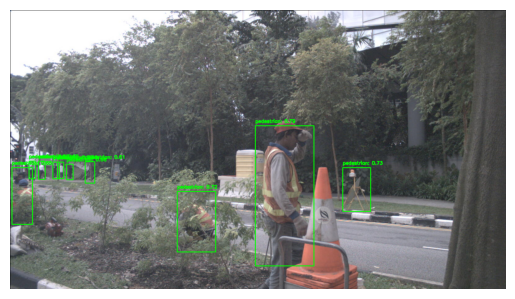

In [ ]:
import cv2
from albumentations import Compose, Resize, Normalize
from albumentations.pytorch import ToTensorV2
import os
import albumentations as A

# Define preprocessing pipeline
preprocess = A.Compose([
    A.Resize(height=config.IMAGE_SIZE, width=config.IMAGE_SIZE),
    A.Normalize(mean=[0.4112, 0.4124, 0.4119], std=[0.2038,0.2032, 0.2033], max_pixel_value=255),
    ToTensorV2(),
])


image_dataset = "/content/drive/MyDrive/datasets/Nuim_dataset/images"
# list_of_images = os.listdir(image_dataset)
image_name = "00000410.jpg"

# Load and preprocess the image
image_path = image_dataset + "/" + image_name
# image_path = "/content/test_image_1.jpg"
image = cv2.imread(image_path)
# print(type(image))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
augmented = preprocess(image=image)
image_tensor = augmented["image"]

# Example usage
image_tensor = image_tensor  # Your preprocessed image tensor
anchors = config.ANCHORS

bboxes = get_single_image_bboxes(model, image_tensor, anchors)
# Example usage
draw_bboxes(image, bboxes, config.MY_CLASSES)
